# **Setup**

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib

# **Brgy Geography**

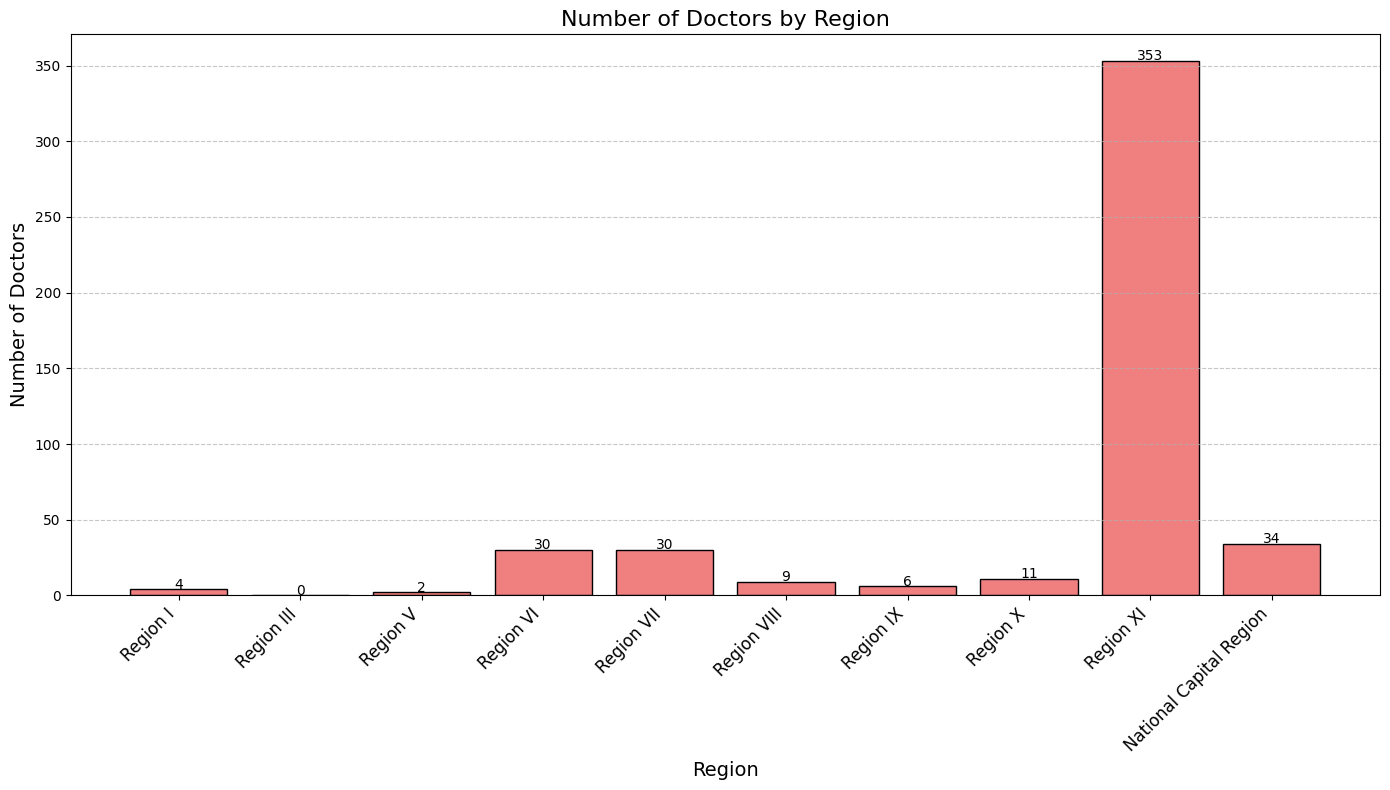

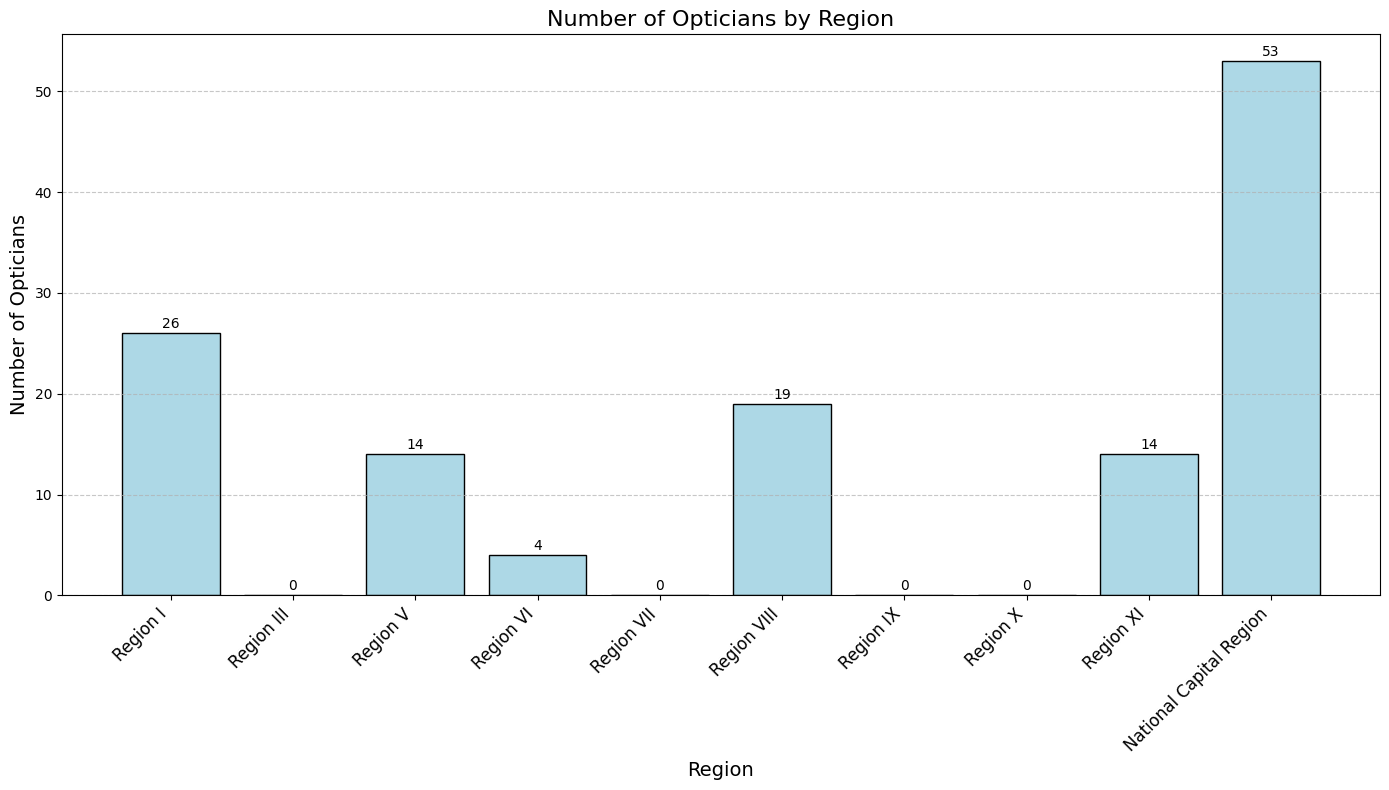

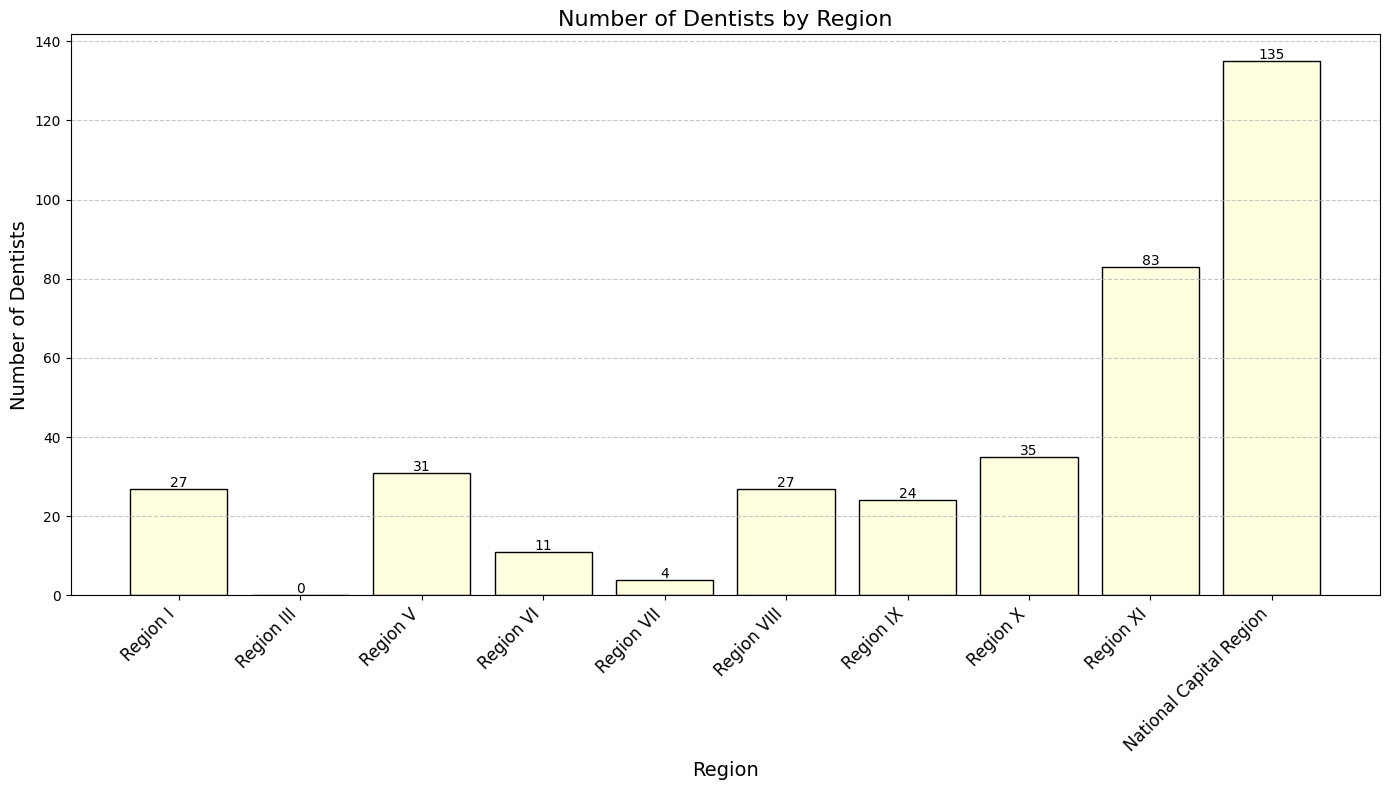

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
location_data = pd.read_csv('location.csv')  # Replace with your file path
osm_poi_health_data = pd.read_csv('osm_poi_health.csv')  # Replace with your file path

# Ensure required columns are present
if 'adm4_pcode' in location_data.columns and 'adm4_pcode' in osm_poi_health_data.columns and \
   'adm1_en' in location_data.columns and \
   'doctors_count' in osm_poi_health_data.columns and \
   'optician_count' in osm_poi_health_data.columns and \
   'dentist_count' in osm_poi_health_data.columns:

    # Merge datasets using 'adm4_pcode'
    merged_data = pd.merge(osm_poi_health_data, location_data, on='adm4_pcode', how='inner')

    # Group by region (adm1_en) and sum the counts for each healthcare category
    healthcare_counts = merged_data.groupby('adm1_en')[['doctors_count', 'optician_count', 'dentist_count']].sum().reset_index()

    # Handle regions without data (fill missing regions with zero counts)
    all_regions = location_data['adm1_en'].unique()
    healthcare_counts = (
        healthcare_counts.set_index('adm1_en')
        .reindex(all_regions, fill_value=0)
        .reset_index()
    )

    # Function to plot individual healthcare count categories
    def plot_category(category, title, ylabel, color):
        plt.figure(figsize=(14, 8))
        bars = plt.bar(
            healthcare_counts['adm1_en'],
            healthcare_counts[category],
            color=color,
            edgecolor='black'
        )
        plt.title(title, fontsize=16)
        plt.xlabel('Region', fontsize=14)
        plt.ylabel(ylabel, fontsize=14)
        plt.xticks(rotation=45, ha='right', fontsize=12)
        plt.grid(axis='y', linestyle='--', alpha=0.7)

        # Add labels to show exact values on each bar
        for bar, count in zip(bars, healthcare_counts[category]):
            plt.text(
                bar.get_x() + bar.get_width() / 2,  # Position at the center of the bar
                bar.get_height() + 0.5,  # Slightly above the bar
                str(int(count)),  # Convert count to integer for display
                ha='center',
                fontsize=10
            )

        plt.tight_layout()
        plt.show()

    # Plot each healthcare service in separate charts
    plot_category('doctors_count', 'Number of Doctors by Region', 'Number of Doctors', 'lightcoral')
    plot_category('optician_count', 'Number of Opticians by Region', 'Number of Opticians', 'lightblue')
    plot_category('dentist_count', 'Number of Dentists by Region', 'Number of Dentists', 'lightyellow')

else:
    print("Required columns ('adm4_pcode', 'adm1_en', 'doctors_count', 'optician_count', 'dentist_count') are not found in the datasets.")


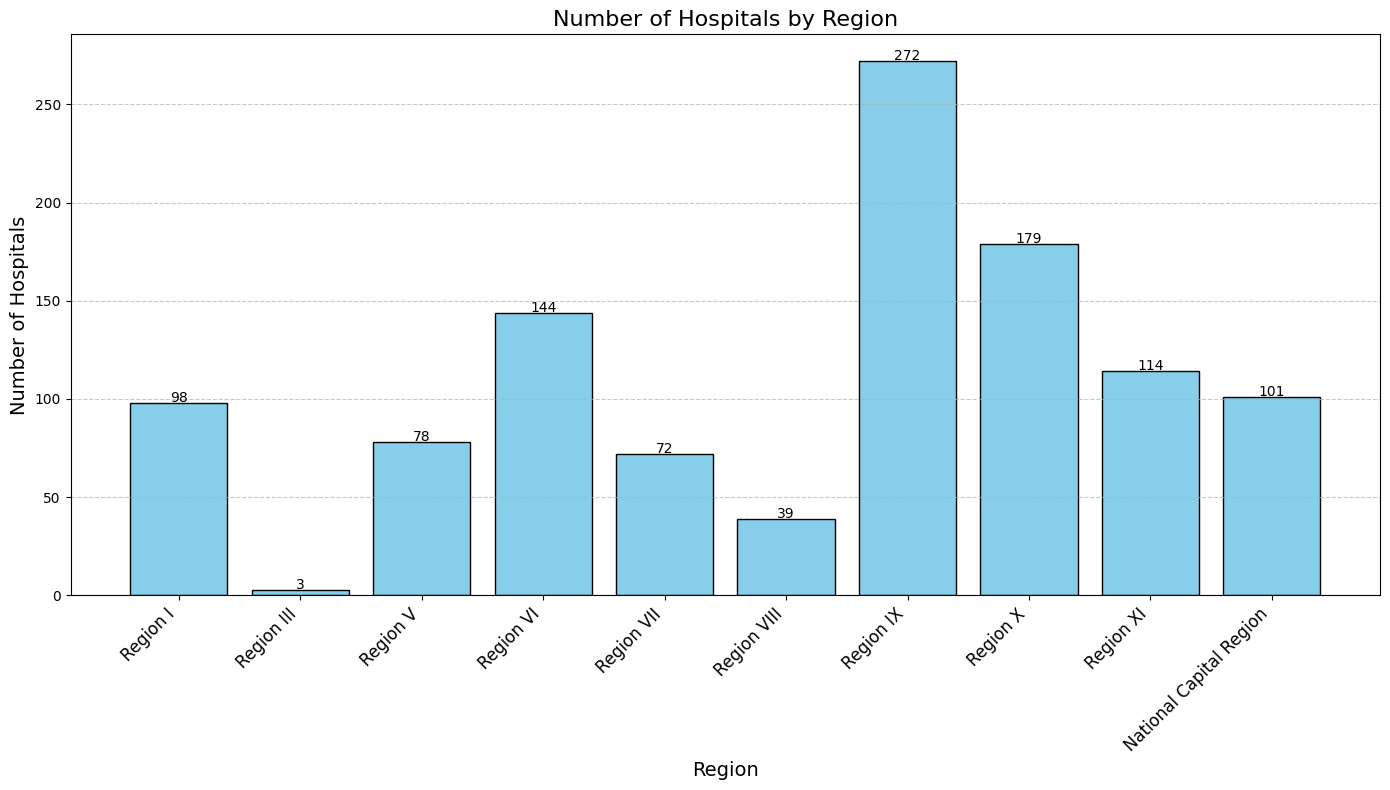

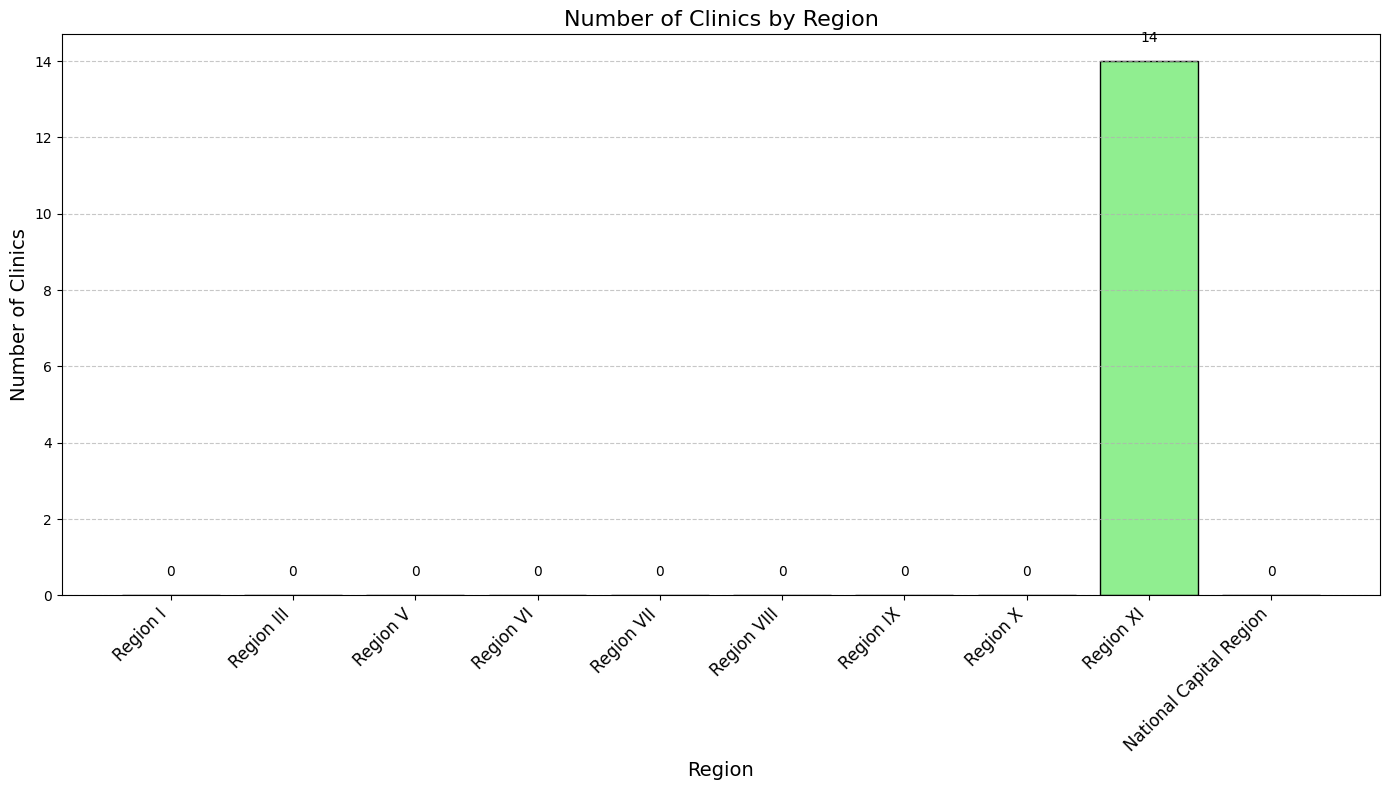

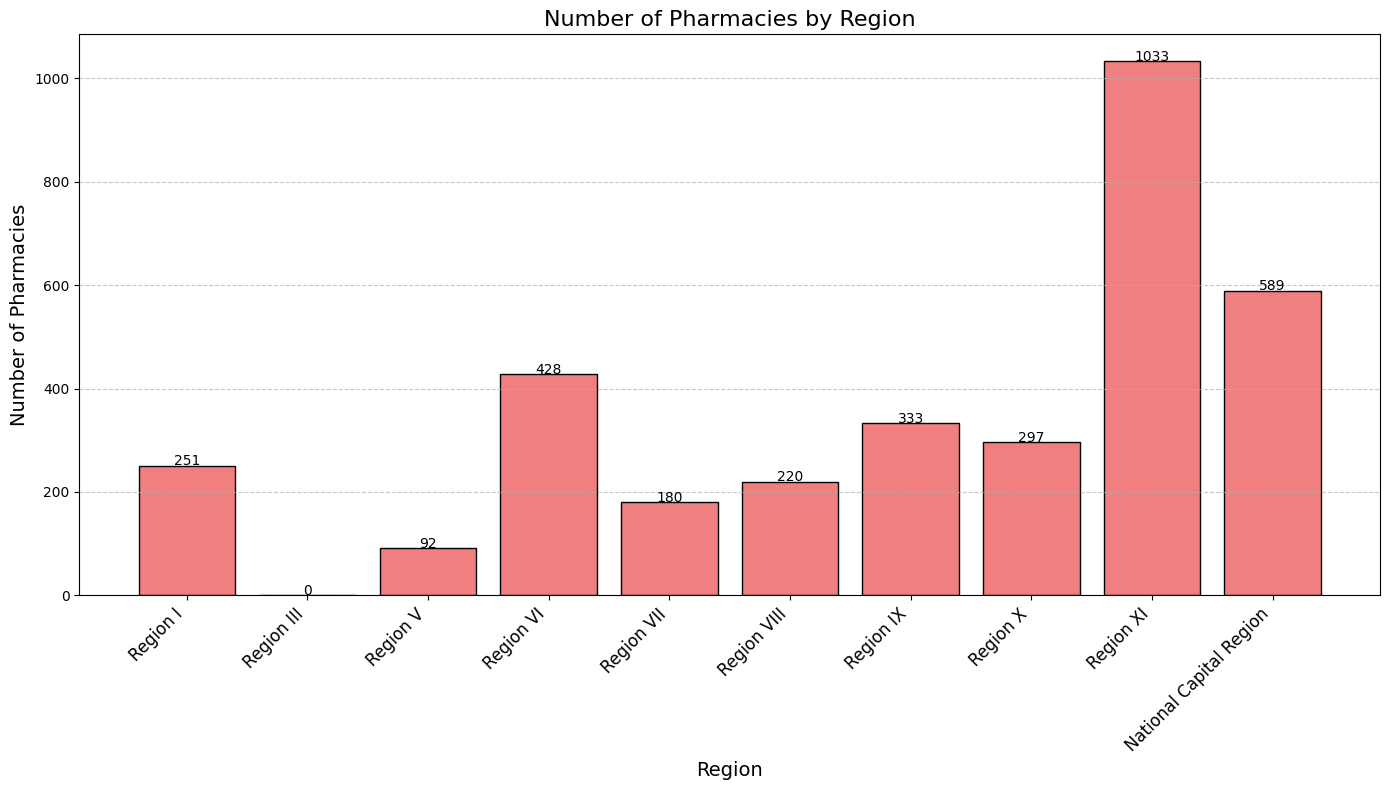

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
location_data = pd.read_csv('location.csv')  # Replace with your file path
osm_poi_health_data = pd.read_csv('osm_poi_health.csv')  # Replace with your file path

# Ensure required columns are present
if 'adm4_pcode' in location_data.columns and 'adm4_pcode' in osm_poi_health_data.columns and \
   'adm1_en' in location_data.columns and \
   'clinic_count' in osm_poi_health_data.columns and \
   'hospital_count' in osm_poi_health_data.columns and \
   'pharmacy_count' in osm_poi_health_data.columns:

    # Merge datasets using 'adm4_pcode'
    merged_data = pd.merge(osm_poi_health_data, location_data, on='adm4_pcode', how='inner')

    # Group by region (adm1_en) and sum the counts for each healthcare category
    healthcare_counts = merged_data.groupby('adm1_en')[['clinic_count', 'hospital_count', 'pharmacy_count']].sum().reset_index()

    # Handle regions without data (fill missing regions with zero counts)
    all_regions = location_data['adm1_en'].unique()
    healthcare_counts = (
        healthcare_counts.set_index('adm1_en')
        .reindex(all_regions, fill_value=0)
        .reset_index()
    )

    # Function to plot individual healthcare count categories
    def plot_category(category, title, ylabel, color):
        plt.figure(figsize=(14, 8))
        bars = plt.bar(
            healthcare_counts['adm1_en'],
            healthcare_counts[category],
            color=color,
            edgecolor='black'
        )
        plt.title(title, fontsize=16)
        plt.xlabel('Region', fontsize=14)
        plt.ylabel(ylabel, fontsize=14)
        plt.xticks(rotation=45, ha='right', fontsize=12)
        plt.grid(axis='y', linestyle='--', alpha=0.7)

        # Add labels to show exact values on each bar
        for bar, count in zip(bars, healthcare_counts[category]):
            plt.text(
                bar.get_x() + bar.get_width() / 2,  # Position at the center of the bar
                bar.get_height() + 0.5,  # Slightly above the bar
                str(int(count)),  # Convert count to integer for display
                ha='center',
                fontsize=10
            )

        plt.tight_layout()
        plt.show()

    # Plot each healthcare service in separate charts
    plot_category('hospital_count', 'Number of Hospitals by Region', 'Number of Hospitals', 'skyblue')
    plot_category('clinic_count', 'Number of Clinics by Region', 'Number of Clinics', 'lightgreen')
    plot_category('pharmacy_count', 'Number of Pharmacies by Region', 'Number of Pharmacies', 'lightcoral')

else:
    print("Required columns ('adm4_pcode', 'adm1_en', 'hospital_count', 'clinic_count', 'pharmacy_count') are not found in the datasets.")
